# King County Housing Analysis

# Overview

To provide inference into King County's desired building standards, this project uses an iterative approach to Regression Modelling in order to understand how the architectual features of a house are correlated with it's selling price. Metricon Homes can not only use this analysis in order to make the most out of their King County Subdivision project, but it may also prove useful if they are afforded similar oppotunities across the County or for other Counties within the U.S.

# Business Problem

Metricon Homes has been listed as the top residential building company in Australia for 2020 & 2021. They have been granted a unique oppotunity to develop a Subdivision of land within the King County area of Washington State, USA. They will design homes and build one on each lot of the Subdivision.
Building in America is completely new territory for an Australian based company. Their deparmtents are unsure if their usual building methods and strategies will suit this North American buying market, and are concerned about losing out on profits for the houses they intend to construct. 

Before construction begins, they wish to see what architectual features of a home within King County may effect the price of the houses they intend to build and sell. It is up to this project to delve into the historical housing data of the area and show the top 3 variables that are most correlated with the price of the house, and provide distinct estimates on how much it increases the value of the properties. This will enable Metricon Homes to have a unique understanding of what may determine house prices within this entirely new region. The business may also use the model on other County's data if they are afforded more projects within the States.

# Data Understanding

The data provided for this project includes the selling price and characteristics of homes that were sold in King County during 2014 and 2015. In it's original state, it has over 21,597 entries, each with a wide variety of information on the house.
Not only did it provide insight into it's construction and architectual features; such as number of floors, bedrooms and bathrooms, but also many columns on it's location as well including whether it was a waterfront property, it's zipcode, and the latitude and longditude.

In [1]:
import pandas as pd

df = pd.read_csv('Data Exploration/data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Through exploration of the data, a few interesting factors were discovered:
1. 17,011 rows within the data, 78% of the houses, had never been renovated prior to being sold.
2. The oldest houses date back to 1900.
3. There were many houses with enormous lot sizes, as they were possibly ranches or large farms with households on them.
4. Only 13 Houses in total were deemed 'Mansion Level' by the 'grade' category.

# Data Preparation & Cleaning

For Regression Modelling to work correctly, all desired columns needed to be in integer or decimal format.  
Thankully with this data set this was the case for most of the architectual categories, except for sqft_basement. This was because those who had collated the data had been using a '?' as a placemarker, supposedly for Null values where they did not know whether the house had a basement or not. Thankfully only 454 rows used this placeholder, so it was appropriate for these values to be replaced with a 0.  

Regarding the houses with the massively large lot sizes, it was deemed pertinent that the outliers (outside of 3 standard deviations from the mean) of this feature be removed. Due to the fact that Metricon Homes is building a subdivision of houses within a neghbourhood, and not rural/farming land, the housing info with these large plots (331 in total) were simply not applicable to the business problem at hand. With this in mind, the houses that had been renovated prior to selling were also removed, as the houses Metricon is building will be sold as new builds only, not houses that garnered repairs.  

For full code and steps on the preparation please view the Jupyter Notebook [Data Cleaning & Exploration](Data_Exploration/Data_Cleaning_&_Exploration.ipynb)

# Regression Modeling

## Model 1

As a baseline to ensure that the model could be used with data it does not currently have, the dataframe was split into train and test sections. Because the dataframe was so large, with 20,520 total entries even after cleaning, a 70/30 split was used.  

The first iteration of the model was to be a simple base-line that could be built-up and extrapolated upon. Looking at some of the highest correlated features to the dependent feature of 'price', the independent features chosen were 'sqft_living', 'grade' and 'sqft_above'.

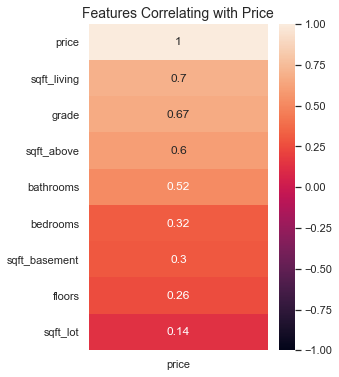

In [2]:
import IPython.display as display
display.Image('Data Exploration/Images/Price_corr.png')

After fitting the model to sklearn's Linear Regression, the RSME score of this baseline model is enormous:
- Train RMSE: 240,000 (2.397e+05)
- Test RMSE:  237, 600 (2.376e+05)  

This is to be somewhat expected with such a simple model, as we've barely provided it anything to train off. What these scores did show was that the model was only slight underfitting compared to the test score, which is useful to know, and certainly better than overfitting the data.

Thankfully though, the models 'price' correlation plot of it's predicted values against the actual values is at least comprehensive, and a slight positive correlation is shown.

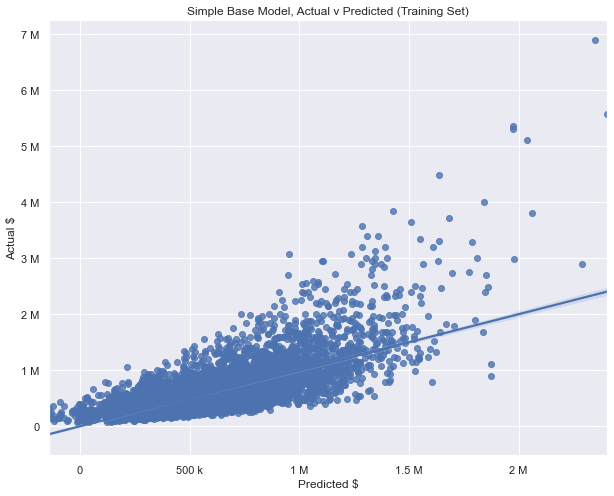

In [3]:
display.Image('Data Exploration/Images/Base_Model.png')

However, it's qq-plot via ols was completely off, exhibiting a high Skew and Kurtosis within our set.

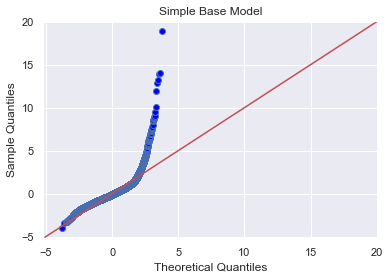

In [4]:
display.Image('Data Exploration/Images/Base_qqplot.png')

It was also discovered by doing a simple regression plot in seabron that the 'grade' feature was showcasing the characteristics of being categorical data.

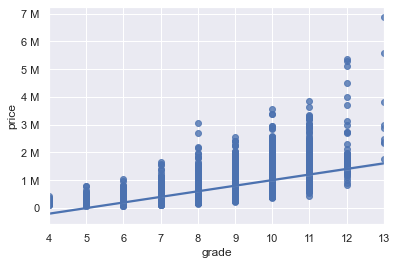

In [5]:
display.Image('Data Exploration/Images/Grade_Catergorical.png')

After researching further into King County's building grade system, it was established that even though it is Ordinal Categorial data, it was still linear in it's scale. For further information pleas head to [King County's Website Glossary](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b)

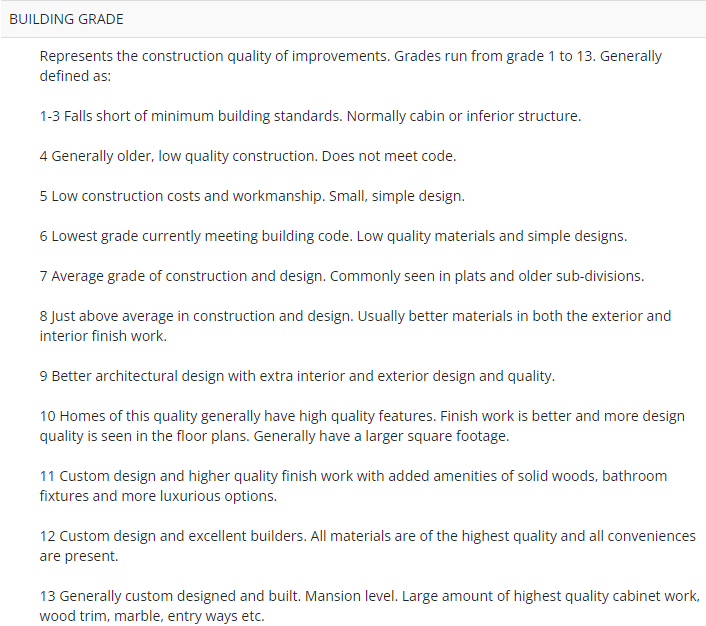

In [6]:
display.Image('Data Exploration/Images/kc_building_grades.png')

## Model 2

Using the evidence gathered from the simple base model, the next iteration involved tackeling the high skew and kurtosis evident, as well as providing the model with knowledge on which features were categorical.

Firstly, through visualisation, the 'price' variable distribution was discernably illustrating positive skewness, with a very large right tail.

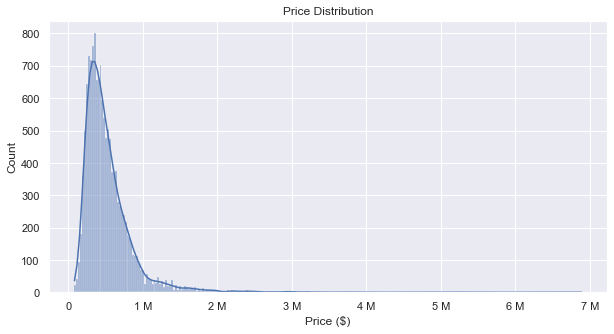

In [7]:
display.Image('Data Exploration/Images/Price_Distribution.png')

This would be why the simple base model was showing such intense Skew and Kurtosis within it's qq-plot, and could also definitly be affecting the high RMSE score.  

In order to adjust for this distribution, the 'price' column needed to be normalised. Through another visualisation of it's values after they had been through a log1p formula, the variable illustrated a much mor normal curve, and confirmed that this form of transformation would be appropriate.

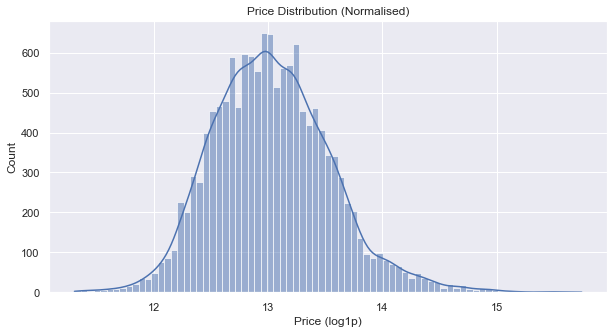

In [8]:
display.Image('Data Exploration/Images/Price_Dist_Normal.png')

Once this normalisation was duplicated on the test split, the RMSE scores had decreased dramatically, even within a normal range of 0.2 - 0.5:  
- Train RMSE: 3.454e-01 (0.34)
- Test RMSE: 3.455e-01 (0.34)  
The train and test scores had also become much closer than the previous iteration.   

Next, the ols model was advised of the categorical nature of the 'grade' variable, and in turn the qq-plot outputted looked much more normal as well.   
However there were still some odd flicks at the start of the figure.

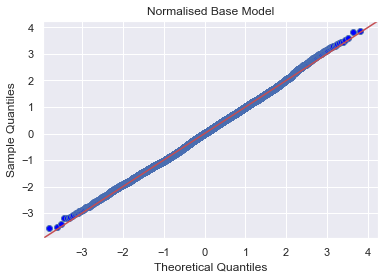

In [9]:
display.Image('Data Exploration/Images/Norm_qqplot.png')

## Model 3

## Model 4

# Regression Results

## Next Steps